## EXPERIMENT 2.3: AdaFace

In [19]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import compute_metrics_ex_2_3, plot_threshold_metrics_ex_2_3
from Plotting_stats_utils.stats_tables import *


from IPython import embed


In [20]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/ada_2_3/'

### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [21]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/2.2/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_finetuning_ex_2_2_ofsi_final.list'

# feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/1.1/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_baseline_ex_1_1.list'


def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [22]:
# # feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.2/similarity_scores_children_bibel_FINAL_INFERENCE_finetuning_2_2.pt'
# feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.1/similarity_scores_children_filtered_bibel_FINAL_INFERENCE_finetuning_frozen_9_layers_2_1.pt'


# image_names_all, ids_all, num_ids_all, norm_feats_all = load_adaface_vectors(feature_list_children)


# # Similarity matrices from adaface - all
# sim_mat_all = np.dot(norm_feats_all, norm_feats_all.T)


# # Dataframes with info, removes names not in magface results
# children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_canonical_df_BIBLE.csv')
# children_all = children_all[children_all.image_name.isin(image_names_all)]



image_names_all, ids_all, num_ids_all, sim_mat_all = load_and_compute_similarity(feature_list_children)

# Dataframes with info, removes names not in magface results
# children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_canonical_df_BIBLE.csv')
children_all = children_all[children_all.image_name.isin(image_names_all)]


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

# Finding the right threshold

In [23]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '1-3', '4-6')

# df_all_threshold_x = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '1-3', '4-6')

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.15
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.18
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more u

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.15
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.18
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more

In [24]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x_1 = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '7-9', '10-12')


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.15
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.18
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more u

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.15
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.18
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more u

In [25]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x_2 = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '13-15', '1-3')


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.15
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.18
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more u

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.15
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.18
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more

In [26]:
df_all_threshold_x

,Iteration,Percentile,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
0,1,0.00,0.000000,0.000000,1.0,1.0,NaN,NaN,NaN,0.00
1,1,0.03,0.000000,0.000000,1.0,1.0,NaN,NaN,NaN,0.03
2,1,0.06,0.000000,0.000000,1.0,1.0,NaN,NaN,NaN,0.06
3,1,0.09,0.000000,0.000000,1.0,1.0,NaN,NaN,NaN,0.09
4,1,0.12,0.000000,0.000000,1.0,1.0,NaN,NaN,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...
63,2,0.87,0.562069,0.583673,0.0,0.0,0.0,0.009428,0.007071,0.87
64,2,0.90,0.579310,0.583673,0.0,0.0,0.0,0.001876,0.001407,0.90
65,2,0.93,0.579310,0.591837,0.0,0.0,0.0,0.005348,0.004011,0.93
66,2,0.96,0.579310,0.600000,0.0,0.0,0.0,0.008772,0.006579,0.96


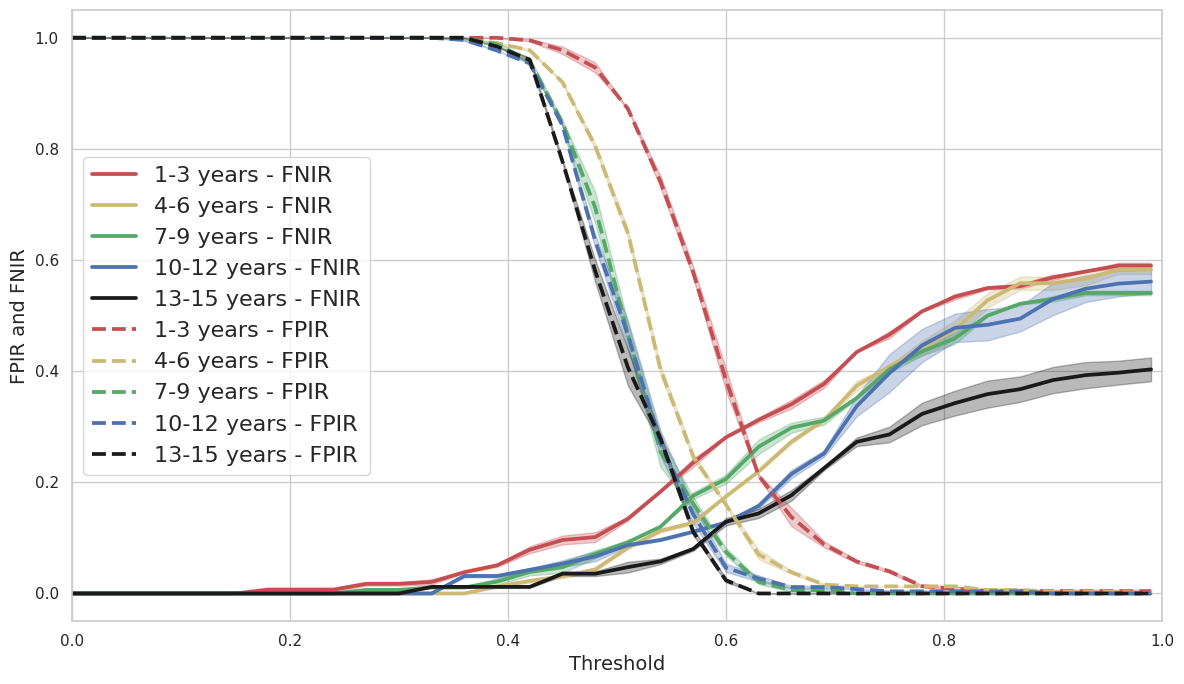

In [27]:
# plot_threshold_metrics_ex_2_3(df_all_threshold_x, df_all_threshold_x_1,df_all_threshold_x_2, save_fig_path )

def plot_threshold_metrics_ex_2_3_w_conf(df_all_threshold_x, df_all_threshold_x_1, df_all_threshold_x_2, save_fig_path):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    def calculate_ci(df, column):
        """Calculate the 95% confidence interval for a column in the DataFrame."""
        mean = df[column].mean()
        std = df[column].std()
        count = df[column].count()
        ci = 1.96 * (std / count**0.5)
        return mean, ci

    # Prepare the data with confidence intervals
    plot_df = df_all_threshold_x.groupby('Threshold').agg(['mean', 'std'])
    plot_df_1 = df_all_threshold_x_1.groupby('Threshold').agg(['mean', 'std'])
    plot_df_2 = df_all_threshold_x_2.groupby('Threshold').agg(['mean', 'std'])

    plt.figure(figsize=(12, 7))

    # Plot FNIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FNIR_c']['mean'], 'r-', label='1-3 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_c']['mean'] - 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5,
                     plot_df['FNIR_c']['mean'] + 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FNIR_a']['mean'], 'y-', label='4-6 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_a']['mean'] - 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5,
                     plot_df['FNIR_a']['mean'] + 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_c']['mean'], 'g-', label='7-9 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_c']['mean'] - 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5,
                     plot_df_1['FNIR_c']['mean'] + 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_a']['mean'], 'b-', label='10-12 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_a']['mean'] - 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5,
                     plot_df_1['FNIR_a']['mean'] + 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FNIR_c']['mean'], 'k-', label='13-15 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FNIR_c']['mean'] - 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5,
                     plot_df_2['FNIR_c']['mean'] + 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FNIR and FPIR', fontsize=14)
    # plt.title('FNIR vs Threshold', fontsize=16)
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    # Plot FPIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FPIR_c']['mean'], 'r--', label='1-3 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_c']['mean'] - 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5,
                     plot_df['FPIR_c']['mean'] + 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FPIR_a']['mean'], 'y--', label='4-6 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_a']['mean'] - 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5,
                     plot_df['FPIR_a']['mean'] + 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_c']['mean'], 'g--', label='7-9 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_c']['mean'] - 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5,
                     plot_df_1['FPIR_c']['mean'] + 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_a']['mean'], 'b--', label='10-12 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_a']['mean'] - 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5,
                     plot_df_1['FPIR_a']['mean'] + 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FPIR_c']['mean'], 'k--', label='13-15 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FPIR_c']['mean'] - 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5,
                     plot_df_2['FPIR_c']['mean'] + 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FPIR and FNIR', fontsize=14)
    # plt.title('FPIR and FNIR vs Threshold', fontsize=16)
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{save_fig_path}TH.png')

    # Show the plot
    plt.show()
plot_threshold_metrics_ex_2_3_w_conf(df_all_threshold_x, df_all_threshold_x_1,df_all_threshold_x_2, save_fig_path )

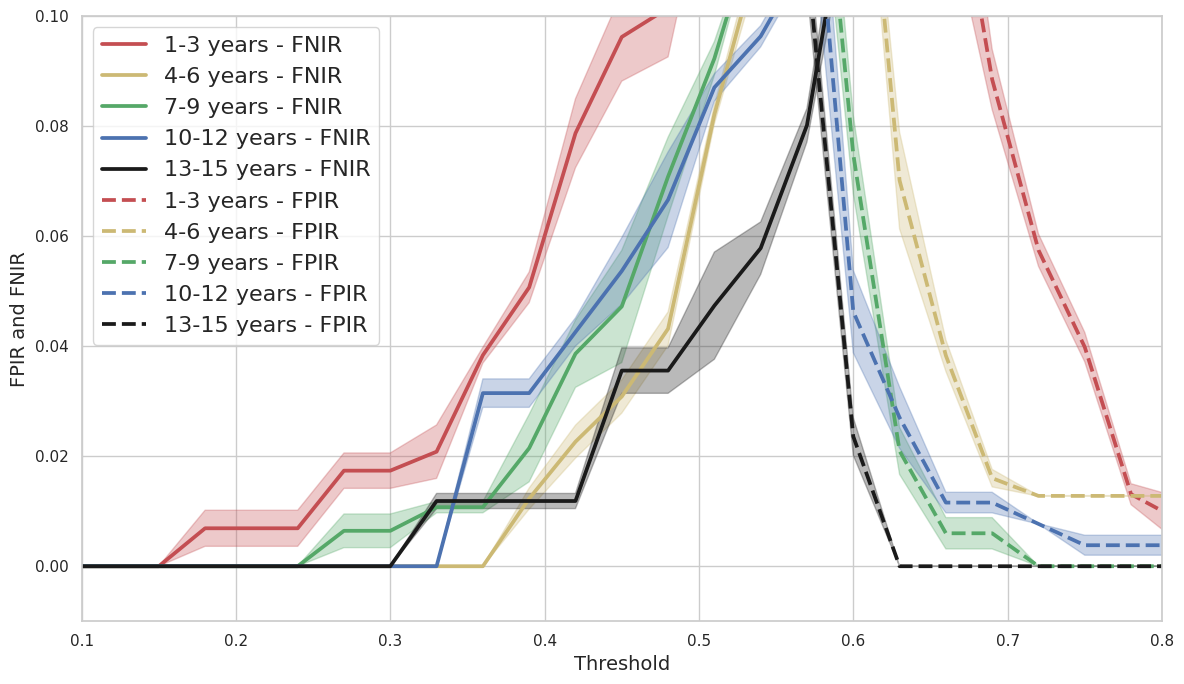

In [43]:

def plot_threshold_metrics_ex_2_3_w_conf_zoomed(df_all_threshold_x, df_all_threshold_x_1, df_all_threshold_x_2, save_fig_path):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    def calculate_ci(df, column):
        """Calculate the 95% confidence interval for a column in the DataFrame."""
        mean = df[column].mean()
        std = df[column].std()
        count = df[column].count()
        ci = 1.96 * (std / count**0.5)
        return mean, ci

    # Prepare the data with confidence intervals
    plot_df = df_all_threshold_x.groupby('Threshold').agg(['mean', 'std'])
    plot_df_1 = df_all_threshold_x_1.groupby('Threshold').agg(['mean', 'std'])
    plot_df_2 = df_all_threshold_x_2.groupby('Threshold').agg(['mean', 'std'])

    plt.figure(figsize=(12, 7))

    # Plot FNIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FNIR_c']['mean'], 'r-', label='1-3 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_c']['mean'] - 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5,
                     plot_df['FNIR_c']['mean'] + 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FNIR_a']['mean'], 'y-', label='4-6 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_a']['mean'] - 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5,
                     plot_df['FNIR_a']['mean'] + 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_c']['mean'], 'g-', label='7-9 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_c']['mean'] - 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5,
                     plot_df_1['FNIR_c']['mean'] + 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_a']['mean'], 'b-', label='10-12 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_a']['mean'] - 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5,
                     plot_df_1['FNIR_a']['mean'] + 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FNIR_c']['mean'], 'k-', label='13-15 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FNIR_c']['mean'] - 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5,
                     plot_df_2['FNIR_c']['mean'] + 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FNIR and FPIR', fontsize=14)
    # plt.title('FNIR vs Threshold', fontsize=16)
    plt.xlim(0.1, 0.8)
    plt.ylim(-0.01,0.1)
    plt.legend(fontsize=16)
    plt.grid(True)

    # Plot FPIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FPIR_c']['mean'], 'r--', label='1-3 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_c']['mean'] - 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5,
                     plot_df['FPIR_c']['mean'] + 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FPIR_a']['mean'], 'y--', label='4-6 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_a']['mean'] - 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5,
                     plot_df['FPIR_a']['mean'] + 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_c']['mean'], 'g--', label='7-9 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_c']['mean'] - 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5,
                     plot_df_1['FPIR_c']['mean'] + 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_a']['mean'], 'b--', label='10-12 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_a']['mean'] - 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5,
                     plot_df_1['FPIR_a']['mean'] + 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FPIR_c']['mean'], 'k--', label='13-15 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FPIR_c']['mean'] - 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5,
                     plot_df_2['FPIR_c']['mean'] + 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FPIR and FNIR', fontsize=14)
    # plt.title('FPIR and FNIR vs Threshold', fontsize=16)
    plt.xlim(0.1, 0.8)
    plt.ylim(-0.01,0.1)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{save_fig_path}TH_zoomed.png')

    # Show the plot
    plt.show()
plot_threshold_metrics_ex_2_3_w_conf_zoomed(df_all_threshold_x, df_all_threshold_x_1,df_all_threshold_x_2, save_fig_path )

In [28]:
def balance_child_data_2_3(y_df, print_stats=False, random_state=42, age = '1-3'):
    """
    Input: raw df for children
    Returns: balanced csvs for different age groups of children
    """
    # Randomly sample 100 from each age group
    data = y_df[y_df['children_agegroup'] == age].sample(n=400, random_state=random_state, replace = True)


    return data

In [29]:
def evaluate_metrics_ex_2_3(random_states, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE,age_1, age_2, remove_ones, threshold_number, alpha_garbe=0.25):
    sim_mat_dict_all = {}
    FNIR_c_list = []
    FNIR_a_list = []
    FPIR_c_list = []
    FPIR_a_list = []
    FPD_list = []
    FND_list = []
    GARBE_list = []
    threshold_list = []

    for random_state_i in random_states:

        ### Load children and adults balanced data ###
        data_1 = balance_child_data_2_3(children_all, print_stats=False, random_state=random_state_i, age=age_1)
        data_2 = balance_child_data_2_3(children_all, print_stats=False, random_state=random_state_i, age=age_2)

        c_mates = data_1.groupby("identity_name").agg({'identity_name': ['count']})
        enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] > 1].index
        enrolled_image_names_c = list(data_1[data_1["identity_name"].isin(enrolled_identity_names_c)].image_name)
        non_enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] == 1].index
        non_enrolled_image_names_c = list(data_1[data_1["identity_name"].isin(non_enrolled_identity_names_c)].image_name)
        all_reference_image_names_c = list(data_1.image_name)

        a_mates = data_2.groupby("identity_name").agg({'identity_name': ['count']})
        enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] > 1].index
        enrolled_image_names_a = list(data_2[data_2["identity_name"].isin(enrolled_identity_names_a)].image_name)
        non_enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] == 1].index
        non_enrolled_image_names_a = list(data_2[data_2["identity_name"].isin(non_enrolled_identity_names_a)].image_name)
        all_reference_image_names_a = list(data_2.image_name)

        # Similarity matrices for ids in reference database
        indices_c_all_reference = [image_names_c.index(name) for name in all_reference_image_names_c]
        indices_a_all_reference = [image_names_a.index(name) for name in all_reference_image_names_a]

        # Extract corresponding columns from the similarity matrix
        sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]
        sim_mat_a_reference_cols = sim_mat_a[:, indices_a_all_reference]

        # Extract corresponding rows from the numerical ids
        num_ids_c_reference = num_ids_c[indices_c_all_reference]
        num_ids_a_reference = num_ids_a[indices_a_all_reference]

        # Similarity matrices for non-enrolled ids
        indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c]
        indices_a_non_enrolled = [image_names_a.index(name) for name in non_enrolled_image_names_a]

        sim_mat_c_non_enrolled_0 = sim_mat_c_reference_cols[indices_c_non_enrolled]
        sim_mat_a_non_enrolled_0 = sim_mat_a_reference_cols[indices_a_non_enrolled]

        num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
        num_ids_a_non_enrolled = num_ids_a[indices_a_non_enrolled]

        # Similarity matrices for enrolled ids
        indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c]
        indices_a_enrolled = [image_names_a.index(name) for name in enrolled_image_names_a]

        sim_mat_c_enrolled_0 = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)]
        sim_mat_a_enrolled_0 = sim_mat_a[np.ix_(indices_a_enrolled, indices_a_enrolled)]

        num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
        num_ids_a_enrolled = num_ids_a[indices_a_enrolled]

        thold = threshold_number



        # Evaluation metrics
        FNIR_c, sim_mat_c_enrolled = compute_fnir(sim_mat_c_enrolled_0, sim_mat_c, enrolled_identity_names_c, num_ids_c_enrolled, ids_c, thold=thold)
        FNIR_a, sim_mat_a_enrolled = compute_fnir(sim_mat_a_enrolled_0, sim_mat_a, enrolled_identity_names_a, num_ids_a_enrolled, ids_a, thold=thold)

        FPIR_c = compute_fpir(sim_mat_c_non_enrolled_0, num_ids_c_non_enrolled, num_ids_c_reference, thold=thold)
        FPIR_a = compute_fpir(sim_mat_a_non_enrolled_0, num_ids_a_non_enrolled, num_ids_a_reference, thold=thold)

        alpha_garbe = 0.25
        FPD_i, FND_i, GARBE_i = GARBE(FNIR_c, FNIR_a, FPIR_c, FPIR_a, alpha=alpha_garbe)

        FNIR_c_list.append(FNIR_c)
        FNIR_a_list.append(FNIR_a)
        FPIR_c_list.append(FPIR_c)
        FPIR_a_list.append(FPIR_a)
        FPD_list.append(FPD_i)
        FND_list.append(FND_i)
        GARBE_list.append(GARBE_i)
        threshold_list.append(thold)

        sim_mat_dict_all[f'sim_mat_c_enrolled_iteration_{random_state_i}'] = sim_mat_c_enrolled
        sim_mat_dict_all[f'sim_mat_a_enrolled_iteration_{random_state_i}'] = sim_mat_a_enrolled
        sim_mat_dict_all[f'sim_mat_c_non_enrolled_iteration_{random_state_i}'] = remove_ones(sim_mat_c_non_enrolled_0)
        sim_mat_dict_all[f'sim_mat_a_non_enrolled_iteration_{random_state_i}'] = remove_ones(sim_mat_a_non_enrolled_0)

        print("done")


    data = {
        'Iteration': random_states,
        'FNIR_c': FNIR_c_list,
        'FNIR_a': FNIR_a_list,
        'FPIR_c': FPIR_c_list,
        'FPIR_a': FPIR_a_list,
        'FPD': FPD_list,
        'FND': FND_list,
        'GARBE': GARBE_list,
        'Threshold': threshold_list
    }

    df_all_results = pd.DataFrame(data)
    return df_all_results, sim_mat_dict_all

In [30]:
random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results_1, sim_mat_dict_all_magface_ex2_3_1 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '1-3', '4-6' , remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)

df_all_results_1.rename(columns={
    'FNIR_c': 'FNIR_1_3',
    'FNIR_a': 'FNIR_4_6',
    'FPIR_c': 'FPIR_1_3',
    'FPIR_a': 'FPIR_4_6'
}, inplace=True)

# Dropping columns
df_all_results_1.drop(columns=['FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


df_all_results_1.describe().applymap(lambda x: f"{x:.3f}")

FPD result:  0.04883457595792406
FND result:  0.37246507435781884
GARBE result, GARBE close to 1 means more unfair:  0.29155744975784514
done
FPD result:  0.10549760570177094
FND result:  0.23302646720368236
GARBE result, GARBE close to 1 means more unfair:  0.2011442518282045
done
FPD result:  0.02870696436244965
FND result:  0.21220930232558138
GARBE result, GARBE close to 1 means more unfair:  0.16633371783479847
done
FPD result:  0.1186283765791377
FND result:  0.17645429362880888
GARBE result, GARBE close to 1 means more unfair:  0.16199781436639107
done
FPD result:  0.24140810957531222
FND result:  0.10450160771704184
GARBE result, GARBE close to 1 means more unfair:  0.13872823318160943
done
FPD result:  0.1800011748465354
FND result:  0.2549563838223632
GARBE result, GARBE close to 1 means more unfair:  0.23621758157840625
done
FPD result:  0.1545358649789038
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.4136339662447259
done
FPD result:  0.0
FND result:

/tmp/ipykernel_27046/1094775324.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results_1.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_1_3,FNIR_4_6,FPIR_1_3,FPIR_4_6
count,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.031,0.018,0.997,0.989
std,3.028,0.015,0.011,0.005,0.007
min,1.000,0.010,0.000,0.990,0.978
25%,3.250,0.021,0.014,0.993,0.987
50%,5.500,0.032,0.016,1.000,0.990
75%,7.750,0.040,0.023,1.000,0.994
max,10.000,0.057,0.037,1.000,1.000


In [31]:
random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results_2, sim_mat_dict_all_magface_ex2_3_2 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '7-9', '10-12' , remove_ones, 0.390
)
df_all_results_2.rename(columns={
    'FNIR_c': 'FNIR_7_9',
    'FNIR_a': 'FNIR_10_12',
    'FPIR_c': 'FPIR_7_9',
    'FPIR_a': 'FPIR_10_12'
}, inplace=True)

# Dropping columns
df_all_results_2.drop(columns=['FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


df_all_results_2.describe().applymap(lambda x: f"{x:.3f}")

FPD result:  0.05817139123321032
FND result:  0.3112813370473538
GARBE result, GARBE close to 1 means more unfair:  0.24800385059381794
done
FPD result:  0.14010570549731144
FND result:  0.06886069257203277
GARBE result, GARBE close to 1 means more unfair:  0.08667194580335244
done
FPD result:  0.07025606519686194
FND result:  0.060928433268858814
GARBE result, GARBE close to 1 means more unfair:  0.0632603412508596
done
FPD result:  0.4339420744756742
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.48348551861891853
done
FPD result:  0.23145892698471102
FND result:  0.16946640316205533
GARBE result, GARBE close to 1 means more unfair:  0.18496453411771926
done
FPD result:  0.16580970243643997
FND result:  0.11812117843246245
GARBE result, GARBE close to 1 means more unfair:  0.13004330943345682
done


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  inf
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
done
FPD result:  0.08206049715483756
FND result:  0.14622641509433962
GARBE result, GARBE close to 1 means more unfair:  0.1301849356094641
done
FPD result:  0.1694575900982881
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.417364397524572
done
FPD result:  0.13376578756458787
FND result:  0.2233267992159059
GARBE result, GARBE close to 1 means more unfair:  0.2009365463030764
done


/tmp/ipykernel_27046/2133869302.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results_2.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_7_9,FNIR_10_12,FPIR_7_9,FPIR_10_12
count,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.023,0.018,0.991,0.977
std,3.028,0.017,0.012,0.006,0.006
min,1.000,0.000,0.000,0.982,0.969
25%,3.250,0.010,0.011,0.987,0.974
50%,5.500,0.024,0.022,0.991,0.977
75%,7.750,0.036,0.025,0.994,0.977
max,10.000,0.045,0.037,1.000,0.991


In [32]:
df_all_results_3, sim_mat_dict_all_magface_ex2_3_3 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '13-15', '1-3' , remove_ones, 0.390
)



df_all_results_3.rename(columns={
    'FNIR_c': 'FNIR_13_15',
    'FPIR_c': 'FPIR_13_15',
}, inplace=True)

# Dropping columns
df_all_results_3.drop(columns=['FNIR_a','FPIR_a','FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


FPD result:  0.11745357235774331
FND result:  0.36326300531486555
GARBE result, GARBE close to 1 means more unfair:  0.30181064707558497
done
FPD result:  0.13758232407907606
FND result:  0.2524329861703944
GARBE result, GARBE close to 1 means more unfair:  0.2237203206475648
done
FPD result:  0.356705662425375
FND result:  0.3695652173913044
GARBE result, GARBE close to 1 means more unfair:  0.36635032864982203
done
FPD result:  0.08130018130018003
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.39532504532504503
done
FPD result:  0.39259443959605894
FND result:  0.04294975688816854
GARBE result, GARBE close to 1 means more unfair:  0.13036092756514114
done
FPD result:  0.42052952820851164
FND result:  0.2621247113163972
GARBE result, GARBE close to 1 means more unfair:  0.30172591553942585
done
FPD result:  0.4187209717756345
FND result:  0.18595927116827438
GARBE result, GARBE close to 1 means more unfair:  0.2441496963201144
done
FPD result:  0.387816874763526

In [33]:
df_all_results = pd.concat([df_all_results_1,df_all_results_2,df_all_results_3], axis=1)

In [34]:
df_all_results.describe().applymap(lambda x: f"{x:.3f}")


/tmp/ipykernel_27046/1142005554.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_1_3,FNIR_4_6,FPIR_1_3,FPIR_4_6,Iteration,FNIR_7_9,FNIR_10_12,FPIR_7_9,FPIR_10_12,Iteration,FNIR_13_15,FPIR_13_15
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.031,0.018,0.997,0.989,5.500,0.023,0.018,0.991,0.977,5.500,0.008,0.976
std,3.028,0.015,0.011,0.005,0.007,3.028,0.017,0.012,0.006,0.006,3.028,0.005,0.014
min,1.000,0.010,0.000,0.990,0.978,1.000,0.000,0.000,0.982,0.969,1.000,0.000,0.957
25%,3.250,0.021,0.014,0.993,0.987,3.250,0.010,0.011,0.987,0.974,3.250,0.007,0.964
50%,5.500,0.032,0.016,1.000,0.990,5.500,0.024,0.022,0.991,0.977,5.500,0.009,0.979
75%,7.750,0.040,0.023,1.000,0.994,7.750,0.036,0.025,0.994,0.977,7.750,0.009,0.985
max,10.000,0.057,0.037,1.000,1.000,10.000,0.045,0.037,1.000,0.991,10.000,0.015,1.000


In [35]:
# Generate the LaTeX table
def generate_latex_table(df):
    latex_code = "\\begin{table}\n"
    latex_code += "\\caption{Descriptive Statistics} \n"
    latex_code += "\\label{table:descriptive_stats} \n"
    latex_code += "\\begin{tabular}{ccccccccc} \n"
    latex_code += "\\toprule\n"
    latex_code += "\\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\\\\n"
    latex_code += "\\midrule\n"

    for idx, row in df.iterrows():
        row_data = " & ".join(row.values)
        latex_code += f"\\textbf{{{idx}}} & {row_data} \\\\\n"

    latex_code += "\\bottomrule\n"
    latex_code += "\\end{tabular} \n"
    latex_code += "\\end{table}\n"

    return latex_code


latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.057 & 0.008 & 1.000 & 0.994 & 0.009 & 0.037 & 0.982 & 0.977 & 0.009 & 0.985 \\
\textbf{1} & 0.045 & 0.016 & 1.000 & 0.987 & 0.034 & 0.026 & 0.994 & 0.977 & 0.015 & 0.984 \\
\textbf{2} & 0.040 & 0.016 & 0.990 & 0.994 & 0.013 & 0.010 & 0.994 & 0.991 & 0.006 & 0.957 \\
\textbf{3} & 0.038 & 0.018 & 0.991 & 0.978 & 0.013 & 0.000 & 0.988 & 0.977 & 0.000 & 0.985 \\
\textbf{4} & 0.011 & 0.016 & 1.000 & 0.987 & 0.045 & 0.022 & 1.000 & 0.969 & 0.009 & 0.985 \\
\textbf{5} & 0.039 & 0.013 & 1.000 & 0.981 & 0.035 & 0.022 & 0.994 & 0.975 & 0.012 & 0.957 \\
\textbf{6} & 0.020 & 0.000 & 1.000 & 0.994 & 0.000 & 0.000 & 0.984 & 0.970 & 0.009 & 0.975 \\
\textbf{7} & 0.027 & 0.037 & 1.000 & 1.000 & 0.040 & 0.022 & 0.994 & 0.984 & 0.009 & 0.972 \\
\textbf{8} & 0.023 & 0.03

/tmp/ipykernel_27046/516831097.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [36]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{count} & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 \\
\textbf{mean} & 0.031 & 0.018 & 0.997 & 0.989 & 0.023 & 0.018 & 0.991 & 0.977 & 0.008 & 0.976 \\
\textbf{std} & 0.015 & 0.011 & 0.005 & 0.007 & 0.017 & 0.012 & 0.006 & 0.006 & 0.005 & 0.014 \\
\textbf{min} & 0.010 & 0.000 & 0.990 & 0.978 & 0.000 & 0.000 & 0.982 & 0.969 & 0.000 & 0.957 \\
\textbf{25%} & 0.021 & 0.014 & 0.993 & 0.987 & 0.010 & 0.011 & 0.987 & 0.974 & 0.007 & 0.964 \\
\textbf{50%} & 0.032 & 0.016 & 1.000 & 0.990 & 0.024 & 0.022 & 0.991 & 0.977 & 0.009 & 0.979 \\
\textbf{75%} & 0.040 & 0.023 & 1.000 & 0.994 & 0.036 & 0.025 & 0.994 & 0.977 & 0.009 & 0.985 \\
\textbf{max} & 0.057 & 0.037 & 1.000 & 1.000 & 0.045 & 0.037 & 1.000 & 0.991 & 0.015 & 1.000

/tmp/ipykernel_27046/2945641856.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [37]:
df_all_results.to_csv('df_all_results_ada_2_3.csv', index=False)


# Stats

In [38]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_13_15'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

NameError: name 'stats' is not defined

In [ ]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_4_6'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

In [ ]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_10_12'], df_all_results['FNIR_13_15'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

In [ ]:
def process_iterations(key_pattern, output_file, sim_mat_dict, iteration_range=range(1, 11)):
    # Initialize the list to hold the arrays
    iterations = []

    # Loop to access each array and append it to the list
    for i in iteration_range:
        key = f'{key_pattern}_{i}'
        if key in sim_mat_dict:
            iterations.append(sim_mat_dict[key])

    # Concatenate all arrays into one big array
    iterations_all = np.concatenate(iterations)
    iterations_all = pd.DataFrame(iterations_all)

    # Save to CSV
    iterations_all.to_csv(output_file, index=False)

    # Print the length of the big array
    print(len(iterations_all))


In [ ]:
# age = ['1-3','4-6','7-9','10-12','13-15']
# numbers = [1,2,3]

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)


# age = ['1-3', '4-6', '7-9', '10-12', '13-15']
# datasets = {
#     0: sim_mat_dict_all_magface_ex2_3_1,
#     1: sim_mat_dict_all_magface_ex2_3_1,
#     2: sim_mat_dict_all_magface_ex2_3_2,
#     3: sim_mat_dict_all_magface_ex2_3_2,
#     4: sim_mat_dict_all_magface_ex2_3_3
# }

# key_patterns = [
#     'sim_mat_c_enrolled_iteration',
#     'sim_mat_a_enrolled_iteration',
#     'sim_mat_c_non_enrolled_iteration',
#     'sim_mat_a_non_enrolled_iteration'
# ]

# for idx, age_group in enumerate(age):
#     for key_pattern in key_patterns:
#         output_file = f'{key_pattern.split("_")[2]}_iterations_all_ada_2_3_{age_group}.csv'
#         process_iterations(key_pattern, output_file, datasets[idx])


23162
20602
423738
634410


In [ ]:
import pandas as pd
import numpy as np

def process_iterations(key_pattern, output_file, sim_mat_dict, iteration_range=range(1, 11)):
    iterations = []
    for i in iteration_range:
        key = f'{key_pattern}_{i}'
        if key in sim_mat_dict:
            iterations.append(sim_mat_dict[key])
    iterations_all = np.concatenate(iterations)
    iterations_all = pd.DataFrame(iterations_all)
    iterations_all.to_csv(output_file, index=False)
    print(len(iterations_all))

def descriptive_statistics(mated_scores, nonmated_scores):
    # Placeholder for your descriptive statistics function
    # Replace this with actual implementation
    stats = {
        "mean_mated": np.mean(mated_scores),
        "mean_nonmated": np.mean(nonmated_scores),
        "std_mated": np.std(mated_scores),
        "std_nonmated": np.std(nonmated_scores)
    }
    return pd.DataFrame([stats])

age = ['1-3', '4-6', '7-9', '10-12', '13-15']
datasets = {
    0: sim_mat_dict_all_magface_ex2_3_1,
    1: sim_mat_dict_all_magface_ex2_3_1,
    2: sim_mat_dict_all_magface_ex2_3_2,
    3: sim_mat_dict_all_magface_ex2_3_2,
    4: sim_mat_dict_all_magface_ex2_3_3
}

key_patterns = [
    'sim_mat_c_enrolled_iteration',
    'sim_mat_a_enrolled_iteration',
    'sim_mat_c_non_enrolled_iteration',
    'sim_mat_a_non_enrolled_iteration'
]

for idx, age_group in enumerate(age):
    for key_pattern in key_patterns:
        output_file = f'{key_pattern}_all_ada_2_3_{age_group}.csv'
        process_iterations(key_pattern, output_file, datasets[idx])

loaded_arrays = {}

for age_group in age:
    for key_pattern in key_patterns:
        filename = f'{key_pattern}_all_ada_2_3_{age_group}.csv'
        array_name = f'{key_pattern}_all_ada_{age_group.replace("-", "_")}'
        loaded_arrays[array_name] = pd.read_csv(filename).values.flatten()

# Example usage with descriptive statistics
results = {}

for age_group in age:
    mated_key = f'sim_mat_a_enrolled_iteration_all_ada_{age_group.replace("-", "_")}'
    nonmated_key = f'sim_mat_a_non_enrolled_iteration_all_ada_{age_group.replace("-", "_")}'
    if mated_key in loaded_arrays and nonmated_key in loaded_arrays:
        mated_scores = loaded_arrays[mated_key]
        nonmated_scores = loaded_arrays[nonmated_key]
        stats_system_df = descriptive_statistics(mated_scores, nonmated_scores)
        results[f'stats_system_{age_group.replace("-", "_")}'] = stats_system_df
        display(stats_system_df)

# Access specific results if needed
stats_system_1_3 = results['stats_system_1_3']
stats_system_4_6 = results['stats_system_4_6']
stats_system_7_9 = results['stats_system_7_9']
stats_system_10_12 = results['stats_system_10_12']
stats_system_13_15 = results['stats_system_13_15']


23162
20602
423738
634410
23162
20602
423738
634410
17992
13144
677502
501942
17992
13144
677502
501942
7022
23162
274113
423738


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.492458,0.047669,0.173575,0.100277


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.492458,0.047669,0.173575,0.100277


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.516806,0.046307,0.185407,0.096341


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.516806,0.046307,0.185407,0.096341


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.440273,0.066647,0.177404,0.105072


# loader sim scores

In [ ]:
sim_mat_c_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()


In [ ]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [ ]:
mated_scores1 = sim_mat_a_enrolled_iterations_all_ada
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all_ada
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

In [ ]:
mated_scores2 = sim_mat_c_enrolled_iterations_all_ada
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all_ada
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

In [ ]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [ ]:

# import matplotlib.pyplot as plt
# import numpy as np

# def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram"):
#     def normalise_scores(distribution):
#         return np.ones_like(distribution) / len(distribution)

#     mated_mean = np.mean(mated_scores)

#     plt.figure(figsize=(10, 6))  # Replace 'figure_size' with a specific size if not defined

#     if normalise:
#         plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')  # Replace 'mated_label' with 'Mated Scores'
#         plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')  # Replace 'nonmated_label' with 'Non-mated Scores'
#         ylabel = "Probability Density"
#     else:
#         plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
#         plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
#         ylabel = "Count"

#     plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

#     plt.xlabel("Comparison Score", size=12)  # Replace 'label_fontsize' with 12 or any preferred size
#     plt.ylabel(ylabel, size=12)  # Replace 'label_fontsize' with 12 or any preferred size
#     plt.title(title, size=14)  # Title added here
#     plt.grid(True)
#     plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=10)  # Adjust legend parameters as needed

#     if savename is not None:
#         plt.savefig(savename, bbox_inches="tight")
#         plt.cla()
#         plt.clf()
#         plt.close()
#     else:
#         plt.show()


In [ ]:
from DET_utils.DET_plots import *



plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - AdaFace ex. 2.1 ')


In [ ]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - AdaFace ex. 2.1 ')


# DET curves


In [ ]:
from DET_utils.DET_plots import *

In [ ]:
# mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
# nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)
# plt.figure(figsize=figure_size)
# plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
# plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)
# plt.xlabel("Score", size=label_fontsize)
# plt.ylabel("Probability Density", size=label_fontsize)
# plt.grid(True)
# plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)
# plt.show()

In [ ]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))

# d_prime_system3 = d_prime(mated_scores3, nonmated_scores3)
# print("d' canonical =", round(d_prime_system3, round_digits))


In [ ]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1)

In [ ]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2)

In [ ]:
system_name1 = 'Adults'
system_name2 = 'Children'

det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title="Children vs adults")
det.x_limits = np.array([1e-4, .5])
det.y_limits = np.array([1e-4, .5])
det.x_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.x_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.y_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.y_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.create_figure()
det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
det.legend_on(loc="upper right")
det.show()